Happiness score reports from 2015-2019

**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go

# ADVANCED PLOTING
import seaborn as seabornInstance

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
# STATS
from sklearn import datasets, metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score




Download all the datasets for the years 2015-2019 from https://www.kaggle.com/unsdsn/world-happiness?select=2015.csv

In [2]:
#Load the data
dataset2015 = pd.read_csv('2015.csv')
dataset2016 = pd.read_csv('2016.csv')
dataset2017 = pd.read_csv('2017.csv')
dataset2018 = pd.read_csv('2018.csv')
dataset2019 = pd.read_csv('2019.csv')

Examine the datasets to identify the common predictor coulmns.

In [ ]:
dataset2015.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
dataset2016.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
dataset2017.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
dataset2018.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
dataset2019.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
dataset2015.shape

(158, 12)

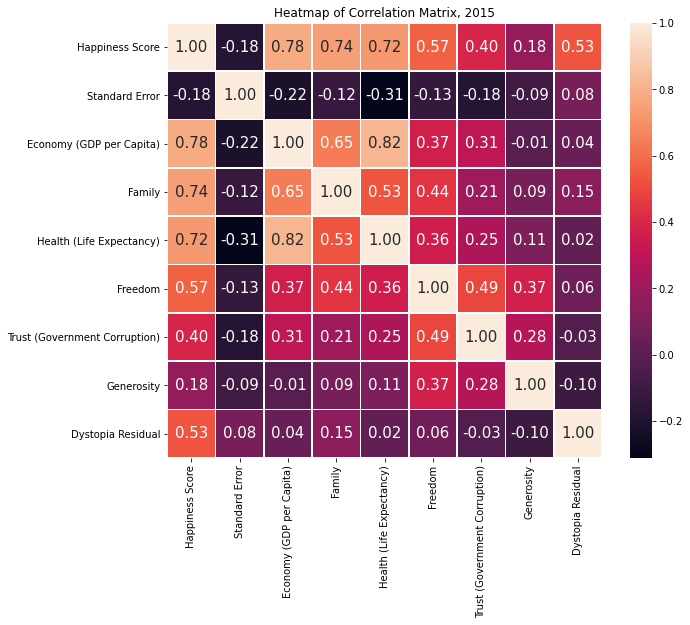

In [3]:
plt.figure(figsize=(10,8))
corr = dataset2015.drop(['Country','Region','Happiness Rank'],axis = 1).corr()
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = .5, fmt='.2f',annot_kws={'size': 15}) 
plt.title('Heatmap of Correlation Matrix, 2015')
plt.show()

**Happiness score across different regions**

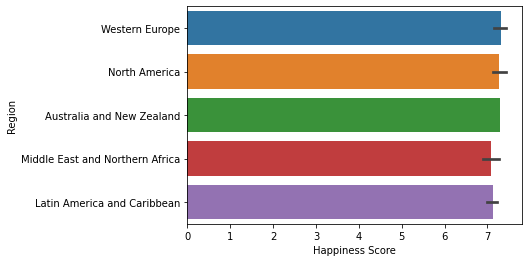

In [ ]:
sns.barplot(y= dataset2015['Region'][:20], x= dataset2015['Happiness Score'])

**Correlations for a particular region**

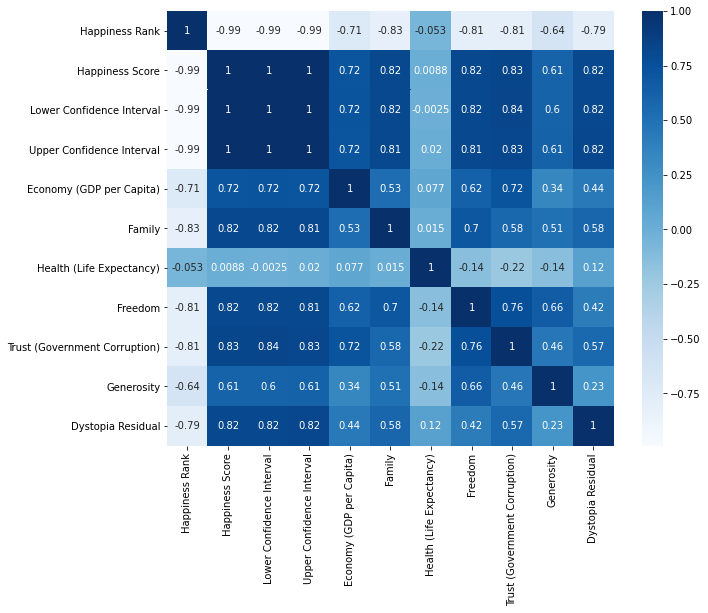

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
d = dataset2016.loc[lambda dataset2016: dataset2016['Region'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'Blues', annot = True)

plt.show()


The Heat Map particularly for Europe has one more thing to add apart from Family Satisfaction, Freedom, Economy, Generosity, It is also highly correlated with Trust in Government.

The European Region is the Happiest Region so far.

# Formatting Datasets

Rename variables in all datasets to common names in order to maintiain uniformity.

Drop columns which are not important.

In [4]:
#2015 Data

dataset2015.rename(columns={"Economy (GDP per Capita)" : "Economy"}, inplace=True)
dataset2015.rename(columns={"Health (Life Expectancy)" : "Health"}, inplace=True)
dataset2015.rename(columns={"Trust (Government Corruption)" : "Trust"}, inplace=True)
dataset2015.drop(['Region','Standard Error', 'Dystopia Residual'],axis=1,inplace=True)
dataset2015['Year'] = 2015 #add year column

dataset2015.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [5]:
#2016 Data
dataset2016.rename(columns={"Economy (GDP per Capita)" : "Economy"}, inplace=True)
dataset2016.rename(columns={"Health (Life Expectancy)" : "Health"}, inplace=True)
dataset2016.rename(columns={"Trust (Government Corruption)" : "Trust"}, inplace=True)
dataset2016.drop(['Region','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'],axis=1,inplace=True)
dataset2016['Year'] = 2016

dataset2016.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [6]:
#2017 Data

dataset2017.rename(columns={"Happiness.Score" : "Happiness Score"}, inplace=True)
dataset2017.rename(columns={"Economy..GDP.per.Capita." : "Economy"}, inplace=True)
dataset2017.rename(columns={"Happiness.Rank" : "Happiness Rank"}, inplace=True)
dataset2017.rename(columns={"Health..Life.Expectancy." : "Health"}, inplace=True)
dataset2017.rename(columns={"Trust..Government.Corruption." : "Trust"}, inplace=True)
dataset2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual'],axis=1,inplace=True)
dataset2017['Year'] = 2017

dataset2017.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Trust,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [7]:
#2018 Data

dataset2018.rename(columns={"Score" : "Happiness Score"}, inplace=True)
dataset2018.rename(columns={"GDP per capita" : "Economy"}, inplace=True)
dataset2018.rename(columns={"Overall rank" : "Happiness Rank"}, inplace=True)
dataset2018.rename(columns={"Country or region" : "Country"}, inplace=True)
dataset2018.rename(columns={"Healthy life expectancy" : "Health"}, inplace=True)
dataset2018.rename(columns={"Freedom to make life choices" : "Freedom"}, inplace=True)
dataset2018.rename(columns={"Social support" : "Family"}, inplace=True)
dataset2018.rename(columns={"Perceptions of corruption" : "Trust"}, inplace=True)
dataset2018['Year'] = 2018

dataset2018.head()


,Happiness Rank,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Trust,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [8]:
#2019 Data

dataset2019.rename(columns={"Score" : "Happiness Score"}, inplace=True)
dataset2019.rename(columns={"GDP per capita" : "Economy"}, inplace=True)
dataset2019.rename(columns={"Overall rank" : "Happiness Rank"}, inplace=True)
dataset2019.rename(columns={"Country or region" : "Country"}, inplace=True)
dataset2019.rename(columns={"Healthy life expectancy" : "Health"}, inplace=True)
dataset2019.rename(columns={"Freedom to make life choices" : "Freedom"}, inplace=True)
dataset2019.rename(columns={"Social support" : "Family"}, inplace=True)
dataset2019.rename(columns={"Perceptions of corruption" : "Trust"}, inplace=True)
dataset2019['Year'] = 2019

dataset2019.head()

,Happiness Rank,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Trust,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [9]:
target = ['Top','Top-Mid', 'Low-Mid', 'Low' ]
target_n = [4, 3, 2, 1]


dataset2015["target"] = pd.qcut(dataset2015['Happiness Rank'], len(target), labels=target)
dataset2015["target_n"] = pd.qcut(dataset2015['Happiness Rank'], len(target), labels=target_n)

dataset2016["target"] = pd.qcut(dataset2016['Happiness Rank'], len(target), labels=target)
dataset2016["target_n"] = pd.qcut(dataset2016['Happiness Rank'], len(target), labels=target_n)

dataset2017["target"] = pd.qcut(dataset2017['Happiness Rank'], len(target), labels=target)
dataset2017["target_n"] = pd.qcut(dataset2017['Happiness Rank'], len(target), labels=target_n)

dataset2018["target"] = pd.qcut(dataset2018['Happiness Rank'], len(target), labels=target)
dataset2018["target_n"] = pd.qcut(dataset2018['Happiness Rank'], len(target), labels=target_n)

dataset2019["target"] = pd.qcut(dataset2019['Happiness Rank'], len(target), labels=target)
dataset2019["target_n"] = pd.qcut(dataset2019['Happiness Rank'], len(target), labels=target_n)

In [10]:
finaldf = dataset2015.append([dataset2016,dataset2017,dataset2018,dataset2019])
# finaldf.dropna(inplace = True)

#CHECKING FOR MISSING DATA
finaldf.isnull().any()

Country            False
Happiness Rank     False
Happiness Score    False
Economy            False
Family             False
Health             False
Freedom            False
Trust               True
Generosity         False
Year               False
target             False
target_n           False
dtype: bool

In [11]:
# FILLING MISSING VALUES OF TRUST WITH ITS MEAN
finaldf.Trust.fillna((finaldf.Trust.mean()), inplace = True)
finaldf.head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Year,target,target_n
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Top,4
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Top,4
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Top,4
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Top,4
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,Top,4
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015,Top,4
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015,Top,4
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015,Top,4
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015,Top,4
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015,Top,4


In [ ]:
finaldf.to_csv('data.csv',index=False) # Write to a CSV file

Happiness Score Distribution over the years 2015-2019

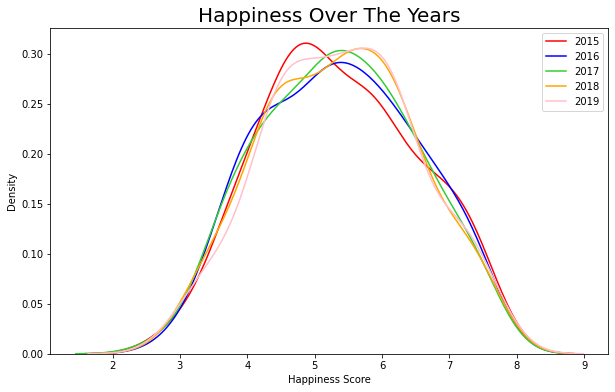

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(dataset2015['Happiness Score'],color='red', label='2015')
sns.kdeplot(dataset2016['Happiness Score'],color='blue', label='2016')
sns.kdeplot(dataset2017['Happiness Score'],color='limegreen', label='2017')
sns.kdeplot(dataset2018['Happiness Score'],color='orange', label='2018')
sns.kdeplot(dataset2019['Happiness Score'],color='pink', label='2019')
plt.title('Happiness Over The Years',size=20)
plt.legend()
plt.show()

Text(0.5, 1.0, 'GDP per capita 2015-2019')

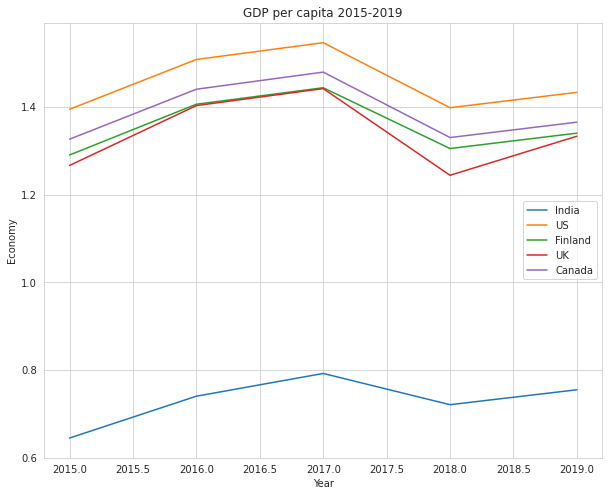

In [33]:
plt.figure(figsize=(10,8))
df = finaldf[finaldf['Country']=='India']
sns.lineplot(x="Year", y="Economy",data=df,label='India')

df = finaldf[finaldf['Country']=='United States']
sns.lineplot(x="Year", y="Economy",data=df,label='US')

df = finaldf[finaldf['Country']=='Finland']
sns.lineplot(x="Year", y="Economy",data=df,label='Finland')

df = finaldf[finaldf['Country']=='United Kingdom']
sns.lineplot(x="Year", y="Economy",data=df,label="UK")

df = finaldf[finaldf['Country']=='Canada']
sns.lineplot(x="Year", y="Economy",data=df,label='Canada')

plt.title("GDP per capita 2015-2019")

Jointplot shows Happiness score increases with GDP increase

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 720x720 with 0 Axes>

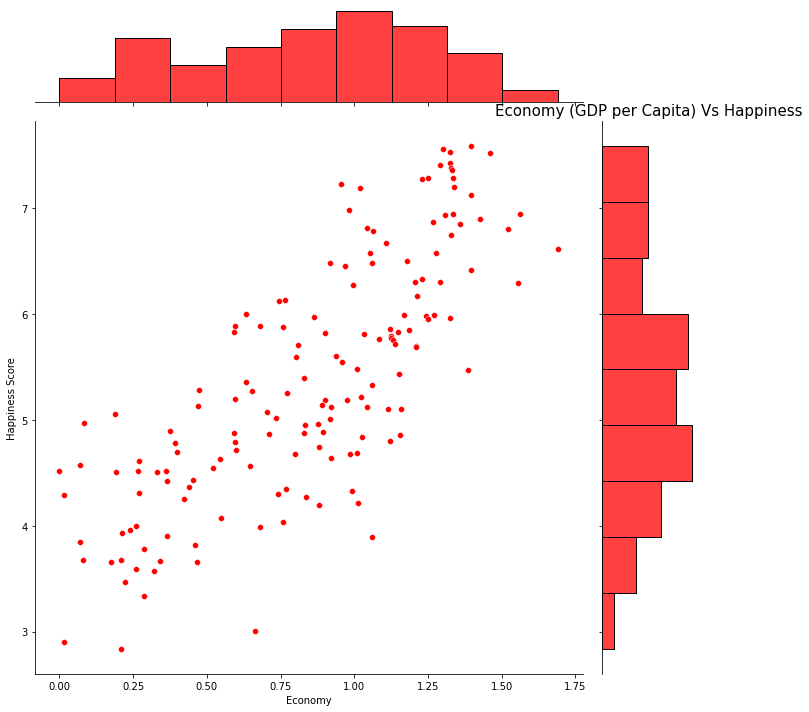

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x = 'Economy', y = 'Happiness Score', data = dataset2015, size=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Economy (GDP per Capita)', fontsize=12)
plt.title('Economy (GDP per Capita) Vs Happiness', fontsize=15)
plt.show()

The straight line fits well means those features are strongly related with Happiness Score.

We've seen linear relationship with Happiness Score and GDP.

Linear regression plotting for Generosity looks worse. Generosity doesn't effect Happiness Score much.

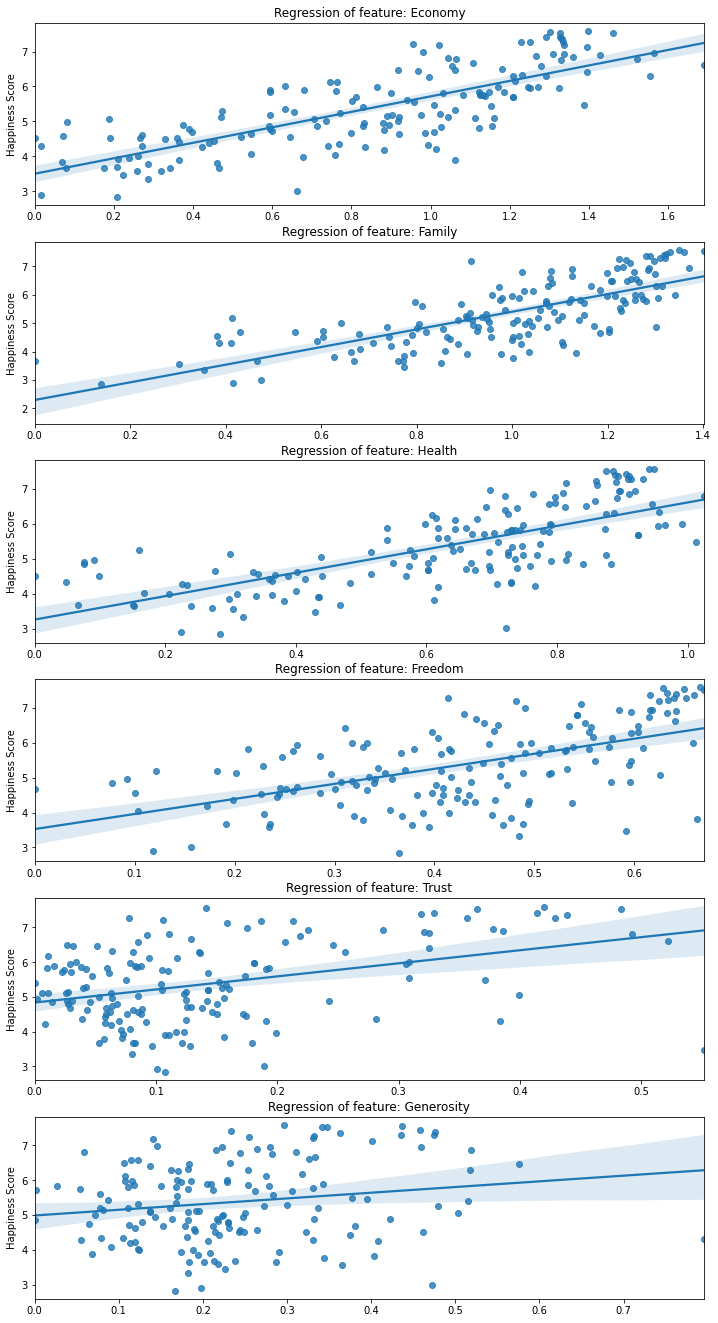

In [ ]:
#Linear Regression Plotting
cols = ['Economy','Family','Health','Freedom','Trust','Generosity']
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(cols):
    ax = plt.subplot(gs[i])
    #sns.distplot(df1[cn], bins=50)
    sns.regplot(x=dataset2015[cn],y='Happiness Score' ,data=dataset2015)
    ax.set_xlabel('')
    ax.set_title('Regression of feature: ' + str(cn))
plt.show()

Economy vs Happiness Score from 2015- 2019

Text(0.5, 1.0, 'Economy vs Happiness Score from 2015- 2019')

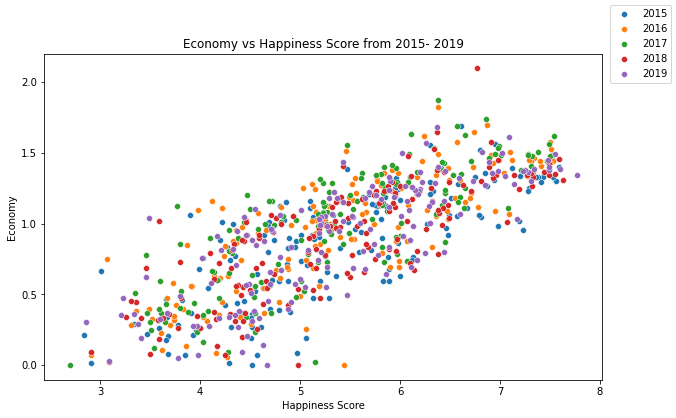

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x= dataset2015['Happiness Score'],y=dataset2015['Economy'])
sns.scatterplot(x= dataset2016['Happiness Score'],y=dataset2016['Economy'])
sns.scatterplot(x= dataset2017['Happiness Score'],y=dataset2017['Economy'])
sns.scatterplot(x= dataset2018['Happiness Score'],y=dataset2018['Economy'])
sns.scatterplot(x= dataset2019['Happiness Score'],y=dataset2019['Economy'])
fig.legend(labels=['2015','2016','2017','2018','2019'])
plt.title("Economy vs Happiness Score from 2015- 2019")

# Top 10 Happy Countries

Let's see how those top happy countries have been through the years

As of March 2020, Finland was ranked the happiest country in the world three times in a row.

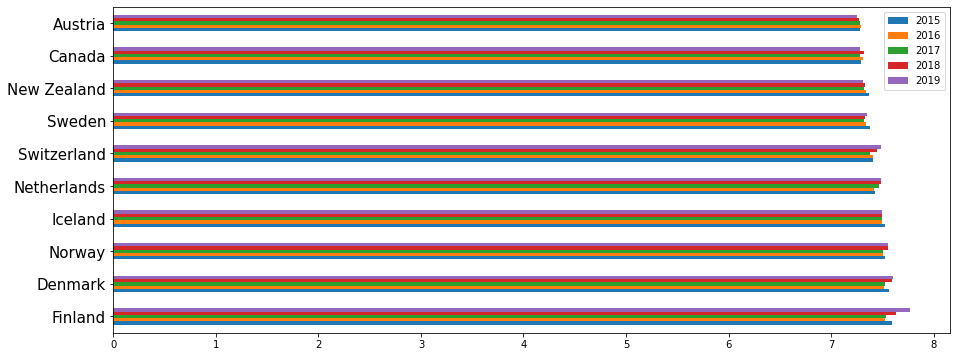

In [ ]:
#Happiness score(year-wise)
data1=[dataset2019['Country'],dataset2015['Happiness Score'],dataset2016['Happiness Score'],dataset2017['Happiness Score'],
       dataset2018['Happiness Score'],dataset2019['Happiness Score']]
headers1=["Country","2015","2016","2017","2018","2019"]
all_years_scores = pd.concat(data1, axis=1, keys=headers1,join='inner')

labels = ['Finland','Denmark','Norway','Iceland','Netherlands','Switzerland','Sweden','New Zealand','Canada','Austria']
top_10=all_years_scores.head(10)
ax=top_10.plot.barh(rot=0)
ax.set_yticklabels(labels)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
fig = plt.gcf()
fig.set_size_inches(15,6)

Many Countries were very consistent in maintaining the scores around 7.

Finland has shown a better improvement by increase in their score every year.

Austria's happiness score has been sloping down at a small rate in all the consecutive years.

There has been a very short dip in 2017 in all the happy countries.

# Top 10 Countries with best Economy

America, Canada, Austrelia, Saudi Arabia, European Countries are the Leaders in the Economy and GDP.

In [ ]:
dataset2017[['Country', 'Economy']].sort_values(by = 'Economy', ascending = False).head(10)

,Country,Economy
34,Qatar,1.870766
17,Luxembourg,1.741944
25,Singapore,1.692278
38,Kuwait,1.632952
20,United Arab Emirates,1.626343
0,Norway,1.616463
3,Switzerland,1.564980
70,"Hong Kong S.A.R., China",1.551675
13,United States,1.546259
14,Ireland,1.535707


In [ ]:
# Visualization of happiness score
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(dataset2015, locations='Country',
                    locationmode='country names',
                    color='Happiness Score',
                    hover_name='Country',
                    title='Happiness Index 2015',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Using the Final dataset from 2015-2019

**How is the Happiness Score distributed?**

As seen below, the Happiness Score has values above 2.85 and below 7.76. There is no single country which has a Happiness Score above 8.

In [1]:
fig = plt.figure(figsize=(8,6))
seabornInstance.distplot(finaldf['Happiness Score'])
plt.title('Distribution of Happiness Score')

NameError: ignored

**Defining a Function to Calculate the Adjusted R2**

R-squared increases when the number of features increases. Sometimes a more robust evaluator is preferred to compare the performance between different models. This evaluator is called adjusted R-squared, and it only increases, if the addition of the variable reduces the MSE.

In [13]:
def  adjusted_R2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

**Defining an Empty dataframe**

This dataframe includes Root Mean Squared Error (RMSE), R-squared, Adjusted R-squared, and mean of the R-squared values obtained by the k-Fold Cross-Validation, which are the essential metrics to compare different models. 

Having an R-squared value closer to one and smaller RMSE means a better fit. 

In the following sections, this dataframe will be filled with the results.

In [14]:
evaluation = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                        })
seabornInstance.set_style(style='whitegrid')

# Simple Linear Regression

**Economy (GDP per capita)**

In [ ]:
train_data_slr, test_data_slr = train_test_split(finaldf, train_size = 0.8, random_state = 3)
lr = LinearRegression()

X_train_slr = np.array(train_data_slr['Economy'], dtype = pd.Series).reshape(-1,1)
y_train_slr = np.array(train_data_slr['Happiness Score'], dtype = pd.Series)
lr.fit(X_train_slr, y_train_slr)

X_test_slr = np.array(test_data_slr['Economy'], dtype = pd.Series).reshape(-1,1)
y_test_slr = np.array(test_data_slr['Happiness Score'], dtype = pd.Series)
pred_slr = lr.predict(X_test_slr)

#ROOT MEAN SQUARED ERROR
rmsesm1 = float(format (np.sqrt(metrics.mean_squared_error(y_test_slr,pred_slr)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm1 = float(format (lr.score(X_train_slr, y_train_slr),'.3f'))
#R-SQUARED (TEST)
rtesm1 = float(format (lr.score(X_test_slr, y_test_slr),'.3f'))
#CROSS VALIDATION SCORE
cv1 = float(format (cross_val_score(lr,finaldf[['Economy']],finaldf['Happiness Score'],cv=5).mean(),'.3f'))

print ("Average Score for Test Data: {:.3f}".format (y_test_slr.mean()))
print ('Intercept: {}'.format (lr.intercept_))
print ('Coefficient: {}'.format (lr.coef_))
print ('Happiness score = ',np.round (lr.intercept_,4),'+',np.round (lr.coef_,4),'* Economy')

r1 = evaluation.shape[0]
evaluation.loc[r1] = ['Simple Linear Regression','-',rmsesm1,rtrsm1,'-',rtesm1,'-',cv1]
evaluation

Average Score for Test Data: 5.388
Intercept: 3.430174973775516
Coefficient: [2.14115845]
Happiness score =  3.4302 + [2.1412] * Economy


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
0,Simple Linear Regression,-,0.708,0.62,-,0.632,-,0.617


The relationship between GDP per capita(Economy of the country) has a strong positive correlation with Happiness Score, that is, if the GDP per capita of a country is higher than the Happiness Score of that country, it is also more likely to be high.

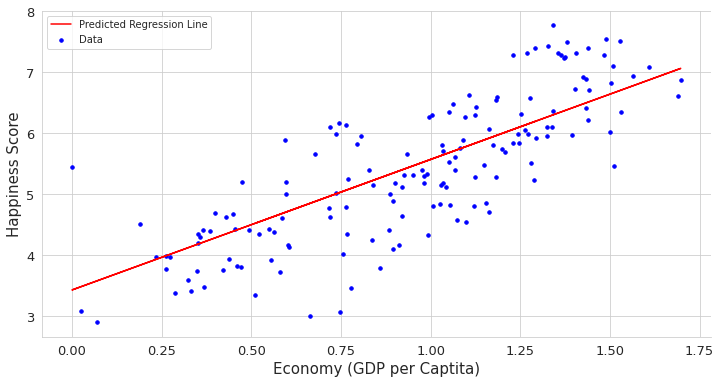

In [ ]:
# Plot
seabornInstance.set_style(style='whitegrid')

plt.figure(figsize=(12,6))
plt.scatter(X_test_slr, y_test_slr, color='blue', label="Data", s = 12)
plt.plot(X_test_slr, lr.predict(X_test_slr), color="red", label="Predicted Regression Line")
plt.xlabel("Economy (GDP per Captita)", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
'''Happiness score vs gdp per capital'''
px.scatter(finaldf, x="Economy", y="Happiness Score", animation_frame="Year",
           animation_group="Country",
           size="Happiness Rank", color="Country", hover_name="Country",
           trendline= "ols")

# Multiple Linear Regression

In [15]:
train_data, test_data = train_test_split(finaldf, train_size = 0.8, random_state=3)
independent_var = ['Economy','Health','Freedom','Family','Generosity','Trust']

X_train = train_data[independent_var]
y_train = train_data['Happiness Score']

mlr = LinearRegression()
mlr.fit(X_train,y_train)

X_test = test_data[independent_var]
y_test = test_data['Happiness Score']
pred = mlr.predict(X_test)

print ('Intercept: {}'.format (mlr.intercept_))
print ('Coefficients: {}'.format (mlr.coef_))
print ('Happiness score = ',np.round (mlr.intercept_,4),
      '+',np.round (mlr.coef_[0],4),'∗ Family',
      '+',np.round (mlr.coef_[1],4),'* Economy', 
      '+',np.round (mlr.coef_[2],4),'* Health',
      '+',np.round (mlr.coef_[3],4),'* Freedom',
       '+',np.round (mlr.coef_[4],4),'* Generosity',
      '+',np.round (mlr.coef_[5],4),'* Trust')


#ROOT MEAN SQUARED ERROR
rmsecm = float(format (np.sqrt(metrics.mean_squared_error(y_test , pred)),'.3f'))

#R-SQUARED (TRAINING)
rtrcm = float(format (mlr.score(X_train, y_train),'.3f'))

#ADJUSTED R-SQUARED (TRAINING)
artrcm = float(format (adjusted_R2(mlr.score(X_train, y_train),
                            train_data.shape[0],
                            len (independent_var)),'.3f'))

#R-SQUARED (TEST)
rtecm = float(format (mlr.score(X_test, y_test),'.3f'))

#ADJUSTED R-SQUARED (TEST)
artecm = float(format (adjusted_R2(mlr.score(X_test, y_test),
                        test_data.shape[0],
                        len (independent_var)),'.3f'))

#CROSS VALIDATION SCORE
cv = float(format (cross_val_score(mlr, finaldf[independent_var], finaldf['Happiness Score'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression','using 6 main features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 2.1884796469865724
Coefficients: [1.12724424 0.98795953 1.44561218 0.65576355 0.71379289 0.85693148]
Happiness score =  2.1885 + 1.1272 ∗ Family + 0.988 * Economy + 1.4456 * Health + 0.6558 * Freedom + 0.7138 * Generosity + 0.8569 * Trust


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
0,Multiple Linear Regression,using 6 main features,0.568,0.764,0.762,0.763,0.755,0.739


# Multilayer Perceptron

In [ ]:
train_data, test_data = train_test_split(finaldf, train_size = 0.8, random_state=3)
independent_var = ['Economy','Health','Freedom','Family','Generosity','Trust']

X_train = train_data[independent_var]
y_train = train_data['Happiness Score']
X_test = test_data[independent_var]
y_test = test_data['Happiness Score']

from sklearn.neural_network import MLPRegressor

In [25]:
#2 hidden layers with 30 and 20 neurons each
mlp = MLPRegressor(hidden_layer_sizes=(100,), solver='lbfgs', learning_rate='adaptive', max_iter=1000, learning_rate_init=0.01)
mlp.fit(X_train,y_train)
pred = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [26]:
#ROOT MEAN SQUARED ERROR
rmsecm = float(format (np.sqrt(metrics.mean_squared_error(y_test , pred)),'.3f'))

#R-SQUARED (TRAINING)
rtrcm = float(format (mlp.score(X_train, y_train),'.3f'))

#ADJUSTED R-SQUARED (TRAINING)
artrcm = float(format (adjusted_R2(mlp.score(X_train, y_train),
                            train_data.shape[0],
                            len (independent_var)),'.3f'))

#R-SQUARED (TEST)
rtecm = float(format (mlp.score(X_test, y_test),'.3f'))

#ADJUSTED R-SQUARED (TEST)
artecm = float(format (adjusted_R2(mlp.score(X_test, y_test),
                        test_data.shape[0],
                        len (independent_var)),'.3f'))

#CROSS VALIDATION SCORE
cv = float(format (cross_val_score(mlp, finaldf[independent_var], finaldf['Happiness Score'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multilayer Perceptron','one hidden, lbfgs',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
3,Multilayer Perceptron,one hidden layer,0.498,0.885,0.884,0.818,0.812,0.748
5,Multilayer Perceptron,adam,0.562,0.766,0.765,0.768,0.761,0.744
0,Multiple Linear Regression,using 6 main features,0.568,0.764,0.762,0.763,0.755,0.739
4,Multilayer Perceptron,adam,0.565,0.764,0.762,0.765,0.758,0.739
6,Multilayer Perceptron,"one hidden, lbfgs",0.499,0.862,0.861,0.817,0.811,0.731
2,Multilayer Perceptron,using 6 main features,0.530,0.886,0.885,0.794,0.787,0.727
1,Multilayer Perceptron,using 6 main features,0.517,0.857,0.856,0.804,0.797,0.725


**Correlation Among Explanatory Variables**

It looks like Economy, Health, and Support are strongly correlated with the Happiness score. 

Freedom correlates quite well with the Happiness score; however, Freedom connects quite well with all data. 

Trust (Government Corruption) still has a mediocre correlation with the Happiness score.

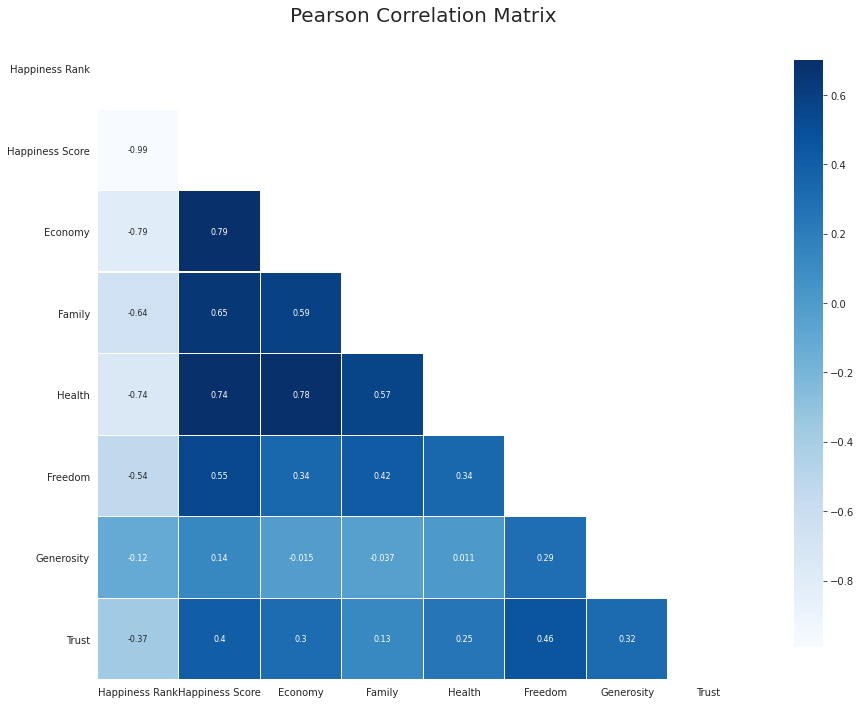

In [ ]:
#Correlations among Variables

usecols = ['Happiness Rank','Country','Happiness Score','Economy','Family',
                'Health','Freedom','Generosity','Trust']

mask = np.zeros_like(finaldf[usecols].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=20)

seabornInstance.heatmap(finaldf[usecols].corr(),
                        linewidths=0.25,vmax=0.7,square=True,cmap="Blues", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Clustering - Trial 1


In [ ]:
h2017=pd.read_csv('2017.csv')

In [ ]:
h2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
country=h2017[h2017.columns[0]]
data= h2017.iloc[:,2:]

In [ ]:
data.head()

,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [34]:
import numpy as np                   # Data manipulation
import pandas as pd                  # DataFrame manipulation
import time                          # To time processes 
import warnings                      # To suppress warnings
import matplotlib.pyplot as plt      # For Graphics
import seaborn as sns
from sklearn import cluster, mixture              # For clustering
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

import os                     # For os related operations
import sys                    # For data size


import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
finaldf.drop(['Country','target', 'Happiness Rank','Year','target_n'],axis=1,inplace=True)
finaldf.head(3)

In [40]:
finaldf.drop(['Year','target_n'],axis=1,inplace=True)
finaldf.head(3)

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Kmeans
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1


In [41]:
def normalizedData(x):
    normalised = StandardScaler()
    normalised.fit_transform(x)
    return(x)
    
data = normalizedData(finaldf)    

n_clusters=3
def Kmeans(x, y):
    km= cluster.KMeans(x)
    km_result=km.fit_predict(y)
    return(km_result)
   
km_result = Kmeans(3,data)
data['Kmeans'] = pd.DataFrame(km_result)
plt.scatter(data.iloc[:, 0], data.iloc[:, 9],  c=km_result)
plt.show()      


IndexError: ignored

Clustering - Trial 2


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time                          # To time processes 
import warnings                      # To suppress warnings
import matplotlib.pyplot as plt      # For Graphics
import seaborn as sns
from sklearn import cluster, mixture # For clustering 
from sklearn.preprocessing import StandardScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('2017.csv')
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
# Data Preprocessing
# check if there are any null values in the data set
data.isnull().any()   


Country                          False
Happiness.Rank                   False
Happiness.Score                  False
Whisker.high                     False
Whisker.low                      False
Economy..GDP.per.Capita.         False
Family                           False
Health..Life.Expectancy.         False
Freedom                          False
Generosity                       False
Trust..Government.Corruption.    False
Dystopia.Residual                False
dtype: bool

In [ ]:
#rename column names
data=data.rename(columns={'Economy..GDP.per.Capita.':'Economy_GDP_Per_Capita',
                          'Health..Life.Expectancy.':'Health_Life_Expectancy',
                          'Trust..Government.Corruption.':'Trust_Government_Corruption',
                          'Happiness.Rank':'Happiness_Rank','Happiness.Score':'Happiness_Score'})

In [ ]:
data.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker.high',
       'Whisker.low', 'Economy_GDP_Per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Generosity',
       'Trust_Government_Corruption', 'Dystopia.Residual'],
      dtype='object')

In [ ]:
df_wh_map = data
df_wh_map.head()

,Country,Happiness_Rank,Happiness_Score,Whisker.high,Whisker.low,Economy_GDP_Per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Clustering is divding data into groups of homogenous or similar data. So that data in same group is more similar to each other and very different from data in other groups. Each group of similar data is called cluster

K Means Clustering - K means clustering works by selecting centroids randomly and number of centroids are inputs to clustering algorithm.Once random centroids are selected then distance from each centroid for each observations are calculated and each observation data is allocated to a centroid to which distance of observation is minimum.

In [27]:
# Method for K means clustering
def kmeans_Clustering(data,numberOfClusters):
       #Initializing Kmeans.cluster object was imported from sklearn in begining.
       kmeans = cluster.KMeans(n_clusters=numberOfClusters)
       # Fitting the input data and getting the cluster labels
       cluster_labels = kmeans.fit_predict(data)
       # Getting the cluster centers
       cluster_centers = kmeans.cluster_centers_
       cluster_centers.shape
       return cluster_labels, cluster_centers

In [28]:
#We will plots clusters of all the 6 dimensions with 2 dimensions in each 2 dimensional plot
#Plot the cluster
def plot_cluster(labels,centers,df_wh):
    #Getting number of columns
    numOfDimensions = df_wh.columns.size
    #Number of plots required for 6 dimension with 2 dimensions in each plot
    numberOfPlots = int(numOfDimensions/2)
    #Number of rows and columns for subplots
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
    for i,j in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
         ax[j].scatter(df_wh.iloc[:, i], df_wh.iloc[:, i+1], c=labels, s=50, cmap='viridis')
         ax[j].scatter(centers[:,i], centers[:, i+1], c='black', s=200, alpha=0.5)
         #print(i)
    plt.subplots_adjust(bottom=-0.5, top=1.5)
    plt.show()

In [31]:
labels,centers = kmeans_Clustering(finaldf,3)     
plot_cluster(labels,centers,data)

ValueError: ignored